### Data Processing

In [1]:
import pandas as pd
import numpy as np
# --- Libraries ---
# - Base libs - 
import os
import numpy as np

# -Tensorflow-
import tensorflow as tf
from tensorflow.python.client import device_lib
# -Keras libs-
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU
from keras.utils import plot_model # pydot, graphviz are dependencies
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import TensorBoard, ModelCheckpoint


# -Plot libs-
import matplotlib.pyplot as plt
from IPython.display import SVG, display
#%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [5]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
#tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

sentence_list=[]
label_list=[]
with open("FinancialPhraseBank-v1.0/Sentences_allAgree.txt", encoding='latin-1') as f:
    raw=f.read()
    raw=raw.split("\n")
    for dt in raw:
        #print(dt)
        #print(dt.split("@"))
        try:
            sentence,label=dt.split("@")
            #tokenize and remove the punctuation
            sentence_list.append(tokenizer.tokenize(sentence))
            label_list.append(label)
        except:
            next
df=pd.DataFrame({"sentence":sentence_list,"label":label_list})       
        
        


In [6]:
df.head()

label                                           sentence
0   neutral  [According, to, Gran, the, company, has, no, p...
1  positive  [For, the, last, quarter, of, 2010, Componenta...
2  positive  [In, the, third, quarter, of, 2010, net, sales...
3  positive  [Operating, profit, rose, to, EUR, 13, 1, mn, ...
4  positive  [Operating, profit, totalled, EUR, 21, 1, mn, ...

In [7]:
df.loc[df["label"]=="positive","label"]=2
df.loc[df["label"]=="negative","label"]=0
df.loc[df["label"]=="neutral","label"]=1

In [8]:
df.to_csv("financeBank.csv",index=False)

### Word Embeddings

# trained word embeddings use your own corpus
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

### USE pretrained word2vec

In [160]:
import gensim

# Load Google's pre-trained Word2Vec model.
#model = gensim.models.Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)  
model_e=gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)  


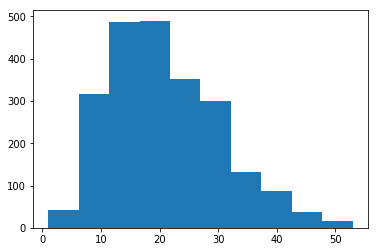

In [180]:
plt.hist(df.sentence.apply(len))
plt.show()

In [181]:
# --- Preparing the IMDB Data ---
from keras.datasets import imdb
from keras.preprocessing import sequence
maxlen=57

In [182]:
sentence_num=[]
for st in df["sentence"].tolist():
    single_sentence=[]
    for w in st:
        try:
            single_sentence.append(model_e[w])
        except:
            single_sentence.append(model_e["UNK"])
    
    single_sentence=sequence.pad_sequences(np.array(single_sentence).T, maxlen = maxlen)
    
    single_sentence=single_sentence.T
        
    sentence_num.append(single_sentence)

np.array(single_sentence).shape

(57, 300)

In [183]:
np.array(sentence_num).shape

(2264, 57, 300)

In [107]:
# ===========================================
#  Importing model and core layers in Keras
# ==========================================
# Importing the sequential model in Keras
# Used as a linear stack of nn layers
from keras.models import Sequential

# Importing core neural networks layers 
from keras.layers import Dense, Dropout, Activation, Flatten

# Importing CNN layers
from keras.layers import Conv2D, MaxPooling2D

# Tools for data transformation
from keras.utils import np_utils

In [277]:
### Modelling
from keras.optimizers import RMSprop
# --- Training model: Embedding + RNN ---
model = Sequential()

#model.add(SimpleRNN(32))
#model.add(GRU(32))
model.add(LSTM(132,input_shape=(maxlen,300)))
#model.add(Flatten())
model.add(Dense(3, activation ='softmax'))


    
# --- Compile Model ---
#Compile model
model.compile(optimizer=RMSprop(lr=0.0001),
             loss = 'categorical_crossentropy',
             metrics=['acc'])


# Verbose=0 -> to avoid jupyter notebook freezing


In [278]:
# Tools for data transformation
from keras.utils import np_utils

input_train=np.array(sentence_num)
y_train2=df["label"].values
y_train=np_utils.to_categorical(y_train2, 3)

In [281]:
model.fit(input_train, y_train, epochs=5, batch_size=128,validation_split = 0.3)

Train on 1584 samples, validate on 680 samples
Epoch 1/5
1584/1584 [==============================] - 8s - loss: 0.7582 - acc: 0.6364 - val_loss: 1.3707 - val_acc: 0.5632
Epoch 2/5
1584/1584 [==============================] - 7s - loss: 0.7475 - acc: 0.6364 - val_loss: 1.5758 - val_acc: 0.5632
Epoch 3/5
1584/1584 [==============================] - 8s - loss: 0.7425 - acc: 0.6364 - val_loss: 1.9587 - val_acc: 0.5632
Epoch 4/5
1584/1584 [==============================] - 9s - loss: 0.7412 - acc: 0.6364 - val_loss: 1.5134 - val_acc: 0.5632
Epoch 5/5
1584/1584 [==============================] - 9s - loss: 0.7413 - acc: 0.6364 - val_loss: 1.9568 - val_acc: 0.5632


In [ ]:
# --- Plotting performance ---
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']



In [157]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
input_train2=input_train.reshape(-1,10800)
clf.fit(input_train2.tolist(), y_train2.tolist())  

TypeError: must be real number, not str

(2264, 10800)

In [151]:
input_train2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [153]:
y_train2.tolist()[0]

2

In [70]:
#padding

### Character level embeddings

In [282]:
# ========================Load data=========================
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input, Embedding, Activation, Flatten, Dense
from keras.layers import Conv1D, MaxPooling1D, Dropout
from keras.models import Model

train_data_source = './data/ag_news_csv/train.csv'
test_data_source = './data/ag_news_csv/test.csv'

train_df = pd.read_csv(train_data_source, header=None)
test_df = pd.read_csv(test_data_source, header=None)

# concatenate column 1 and column 2 as one text
for df in [train_df, test_df]:
    df[1] = df[1] + df[2]
    df = df.drop([2], axis=1)

# convert string to lower case
train_texts = train_df[1].values
train_texts = [s.lower() for s in train_texts]

test_texts = test_df[1].values
test_texts = [s.lower() for s in test_texts]

# =======================Convert string to index================
# Tokenizer
tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
tk.fit_on_texts(train_texts)
# If we already have a character list, then replace the tk.word_index
# If not, just skip below part

# -----------------------Skip part start--------------------------
# construct a new vocabulary
alphabet = "abcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1

# Use char_dict to replace the tk.word_index
tk.word_index = char_dict.copy()
# Add 'UNK' to the vocabulary
tk.word_index[tk.oov_token] = max(char_dict.values()) + 1
# -----------------------Skip part end----------------------------

# Convert string to index
train_sequences = tk.texts_to_sequences(train_texts)
test_texts = tk.texts_to_sequences(test_texts)

# Padding
train_data = pad_sequences(train_sequences, maxlen=1014, padding='post')
test_data = pad_sequences(test_texts, maxlen=1014, padding='post')

# Convert to numpy array
train_data = np.array(train_data, dtype='float32')
test_data = np.array(test_data, dtype='float32')

# =======================Get classes================
train_classes = train_df[0].values
train_class_list = [x - 1 for x in train_classes]

test_classes = test_df[0].values
test_class_list = [x - 1 for x in test_classes]

from keras.utils import to_categorical

train_classes = to_categorical(train_class_list)
test_classes = to_categorical(test_class_list)

FileNotFoundError: File b'./data/ag_news_csv/train.csv' does not exist

In [284]:
# -----------------------Skip part start--------------------------
# construct a new vocabulary
alphabet = "abcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1

# Use char_dict to replace the tk.word_index
tk.word_index = char_dict.copy()
# Add 'UNK' to the vocabulary
tk.word_index[tk.oov_token] = max(char_dict.values()) + 1
# -----------------------Skip part end----------------------------

# Convert string to index
train_sequences = tk.texts_to_sequences(train_texts)
test_texts = tk.texts_to_sequences(test_texts)

# Padding
train_data = pad_sequences(train_sequences, maxlen=1014, padding='post')
test_data = pad_sequences(test_texts, maxlen=1014, padding='post')

# Convert to numpy array
train_data = np.array(train_data, dtype='float32')
test_data = np.array(test_data, dtype='float32')

# =======================Get classes================
train_classes = train_df[0].values
train_class_list = [x - 1 for x in train_classes]

test_classes = test_df[0].values
test_class_list = [x - 1 for x in test_classes]

from keras.utils import to_categorical

train_classes = to_categorical(train_class_list)
test_classes = to_categorical(test_class_list)

AttributeError: 'Tokenizer' object has no attribute 'oov_token'

### Process character level text with keras

In [285]:
sentence_list=[]
label_list=[]
with open("FinancialPhraseBank-v1.0/Sentences_AllAgree.txt", encoding='latin-1') as f:
    raw=f.read()
    raw=raw.split("\n")
    for dt in raw:
        #print(dt)
        #print(dt.split("@"))
        try:
            sentence,label=dt.split("@")
            sentence_list.append(sentence)
            label_list.append(label)
        except:
            next
df=pd.DataFrame({"sentence":sentence_list,"label":label_list})       
        


texts=df["sentence"].values
texts=[s.lower() for s in texts]
train_texts=texts
#df["label"]=1
df.loc[df["label"]=="positive","label"]=1
df.loc[df["label"]=="negative","label"]=-1
df.loc[df["label"]=="neutral","label"]=0

train_df=df.loc[df["label"]!=0,:]


In [286]:
train_df.label.value_counts()

 1    570
-1    303
Name: label, dtype: int64

In [287]:
import ramdom

train_texts=train_df["sentence"][random.sample()]

ModuleNotFoundError: No module named 'ramdom'

In [288]:
# ========================Load data=========================
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input, Embedding, Activation, Flatten, Dense
from keras.layers import Conv1D, MaxPooling1D, Dropout
from keras.models import Model



# =======================Convert string to index================
# Tokenizer
tk = Tokenizer(num_words=None, char_level=True)
tk.fit_on_texts(train_texts)
# If we already have a character list, then replace the tk.word_index
# If not, just skip below part

# -----------------------Skip part start--------------------------
# construct a new vocabulary
#alphabet = "abcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
#char_dict = {}
#for i, char in enumerate(alphabet):
 #   char_dict[char] = i + 1

# Use char_dict to replace the tk.word_index
#tk.word_index = char_dict.copy()
# Add 'UNK' to the vocabulary
#tk.word_index[tk.oov_token] = max(char_dict.values()) + 1
# -----------------------Skip part end----------------------------

# Convert string to index
train_sequences = tk.texts_to_sequences(train_texts)
#test_texts = tk.texts_to_sequences(test_texts)

# Padding
train_data = pad_sequences(train_sequences, maxlen=1014, padding='post')
#test_data = pad_sequences(test_texts, maxlen=1014, padding='post')

# Convert to numpy array
train_data = np.array(train_data, dtype='float32')
#test_data = np.array(test_data, dtype='float32')

# =======================Get classes================
train_classes = train_df["label"].values
train_class_list = [x  for x in train_classes]

#test_classes = test_df[0].values
#test_class_list = [x - 1 for x in test_classes]

from keras.utils import to_categorical

train_classes = to_categorical(train_class_list)
#test_classes = to_categorical(test_class_list)

In [289]:
train_classes

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [290]:
# --- Training model: Embedding + RNN ---
max_features=2264
model = Sequential()
model.add(Embedding(max_features, 64))
#model.add(SimpleRNN(32))
#model.add(GRU(32))
#model.add(LSTM(32))
#model.add(Dense(2, activation ='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 64)          144896    
Total params: 144,896.0
Trainable params: 144,896
Non-trainable params: 0.0
_________________________________________________________________


In [291]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.fit(train_data, train_classes, epochs=5, batch_size=128,validation_split = 0.5)

ValueError: Error when checking model target: expected embedding_14 to have 3 dimensions, but got array with shape (873, 2)

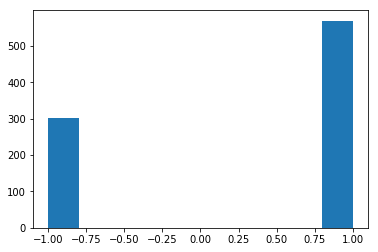

In [255]:
plt.hist(train_df["label"])
plt.show()

In [292]:
t=np.random.randint(1000, size=(32, 10))

In [293]:
t.shape

(32, 10)